Linear Kernel SVM Results:
[[68  3]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

RBF Kernel SVM Results:
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Best Parameters from GridSearchCV:
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Tuned RBF Kernel SVM Results:
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0

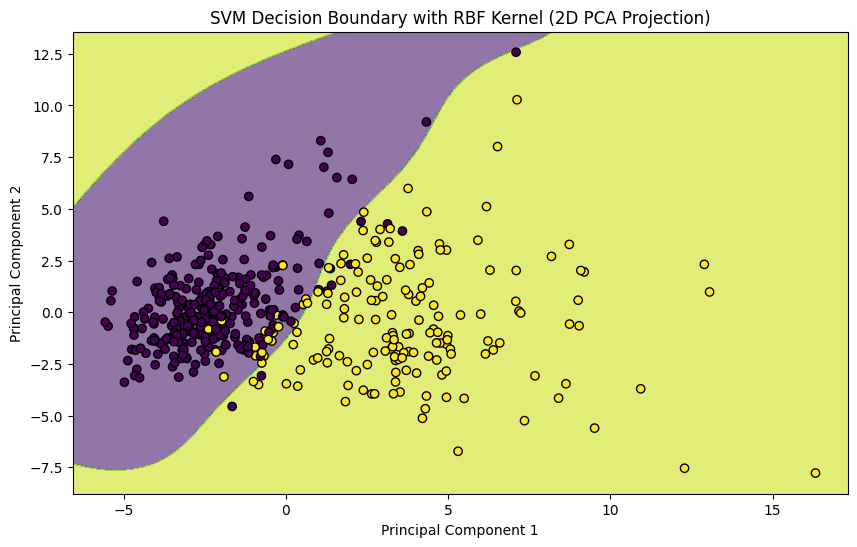

In [1]:
# Task 7 - SVM Classification

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('/content/breast-cancer.csv')

# Drop unnecessary columns
df.drop(columns=['id'], inplace=True, errors='ignore')
df.drop(columns=['Unnamed: 32'], inplace=True, errors='ignore')

# Convert diagnosis column to numeric (B = 0, M = 1)
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

# Features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train SVM with Linear kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print("Linear Kernel SVM Results:")
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("RBF Kernel SVM Results:")
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters from GridSearchCV:")
print(grid.best_params_)

# Predict using best model
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Tuned RBF Kernel SVM Results:")
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

# Cross-validation score
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

# Visualize using only 2 features (for 2D decision boundary)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

X_train_2D, X_test_2D, y_train_2D, y_test_2D = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

svm_vis = SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
svm_vis.fit(X_train_2D, y_train_2D)

# Plot decision boundary
h = .02
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.6)
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train_2D, edgecolors='k')
plt.title("SVM Decision Boundary with RBF Kernel (2D PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
